In [4]:
import pandas as pd

df = pd.read_csv("D:/IBM_PROJECT/Climate_Actions_AI/data/raw/API_AG.LND.FRST.ZS_DS2_en_csv_v2_38121.csv", skiprows=4)




In [5]:
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.039682,30.824316,30.611512,30.391626,30.174252,29.955194,29.737205,NaN,NaN,NaN
2,Afghanistan,AFG,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,1.852782,NaN,NaN,NaN
3,Africa Western and Central,AFW,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,20.152610,20.071327,19.986100,19.901230,19.816784,19.732037,19.647488,NaN,NaN,NaN
4,Angola,AGO,Forest area (% of land area),AG.LND.FRST.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,55.207845,54.762629,54.317406,53.872175,53.426951,52.981722,52.536497,NaN,NaN,NaN


In [6]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())


Shape: (266, 70)
Columns: ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', 'Unnamed: 69']


In [7]:
missing = df.isnull().mean().round(2) * 100
print("Missing values (%):\n", missing)


Missing values (%):
 Country Name        0.0
Country Code        0.0
Indicator Name      0.0
Indicator Code      0.0
1960              100.0
                  ...  
2021                2.0
2022                3.0
2023              100.0
2024              100.0
Unnamed: 69       100.0
Length: 70, dtype: float64


In [8]:
df = df.drop(columns=['Unnamed: 69', '2023', '2024'])


In [9]:
df_long = df.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                  var_name='Year',
                  value_name='Forest Area (% of land)')

# Convert Year column to integer
df_long['Year'] = pd.to_numeric(df_long['Year'], errors='coerce')


In [10]:
df_long = df_long.dropna(subset=['Forest Area (% of land)'])


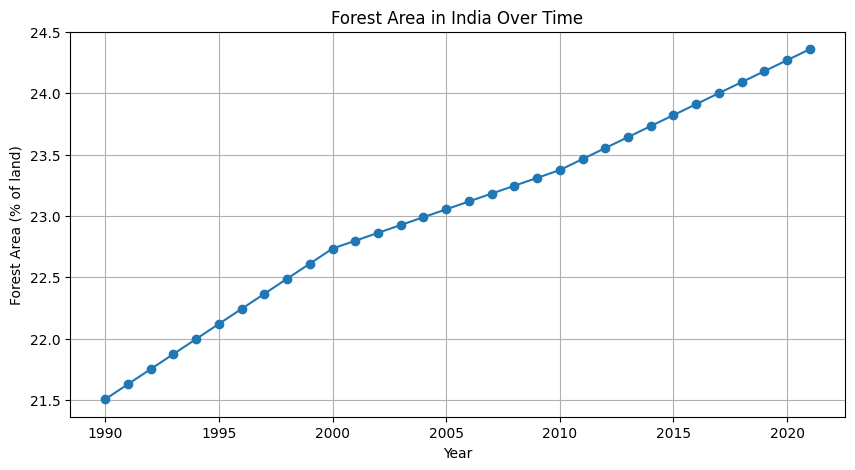

In [11]:
import matplotlib.pyplot as plt

# Example for India
india = df[df['Country Name'] == 'India'].iloc[:, 4:-1].T
india.columns = ['Forest Area (% of land)']
india.index = india.index.astype(int)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(india.index, india['Forest Area (% of land)'], marker='o')
plt.title("Forest Area in India Over Time")
plt.xlabel("Year")
plt.ylabel("Forest Area (% of land)")
plt.grid(True)
plt.show()


In [13]:
# Keep only rows from 1990 onwards
df_long = df_long[df_long['Year'] >= 1990]


In [14]:
df_long.reset_index(drop=True, inplace=True)


In [15]:
df_long.to_csv('cleaned_forest_area_data.csv', index=False)


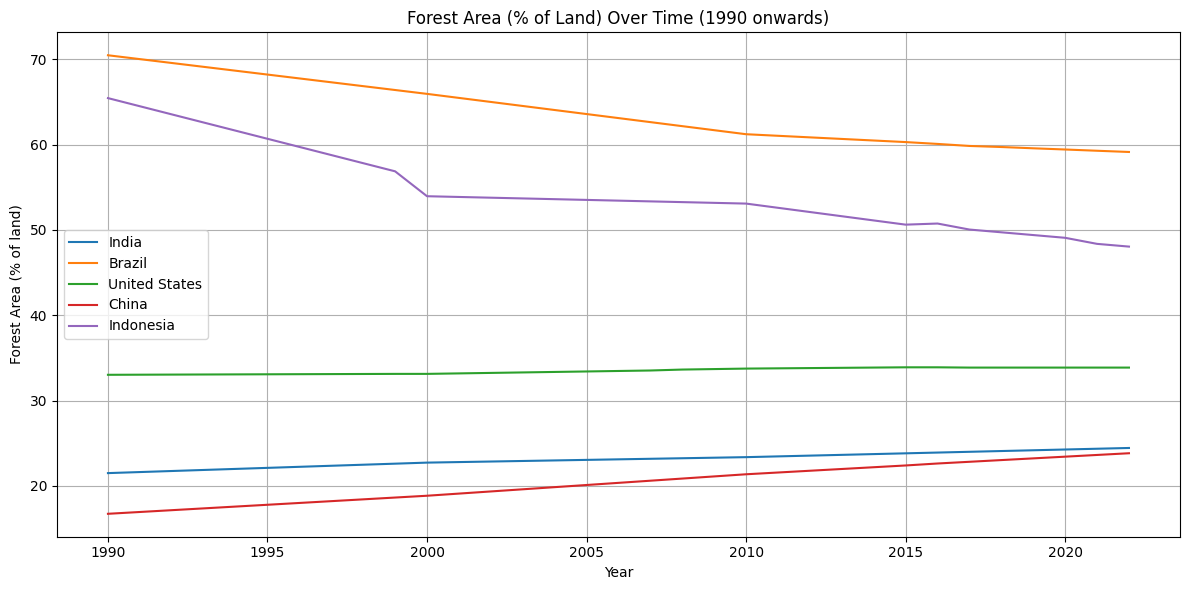

In [16]:
import matplotlib.pyplot as plt

# List of countries to visualize
selected_countries = ['India', 'Brazil', 'United States', 'China', 'Indonesia']

# Filter data
df_selected = df_long[df_long['Country Name'].isin(selected_countries)]

# Plot
plt.figure(figsize=(12, 6))
for country in selected_countries:
    country_data = df_selected[df_selected['Country Name'] == country]
    plt.plot(country_data['Year'], country_data['Forest Area (% of land)'], label=country)

plt.title('Forest Area (% of Land) Over Time (1990 onwards)')
plt.xlabel('Year')
plt.ylabel('Forest Area (% of land)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


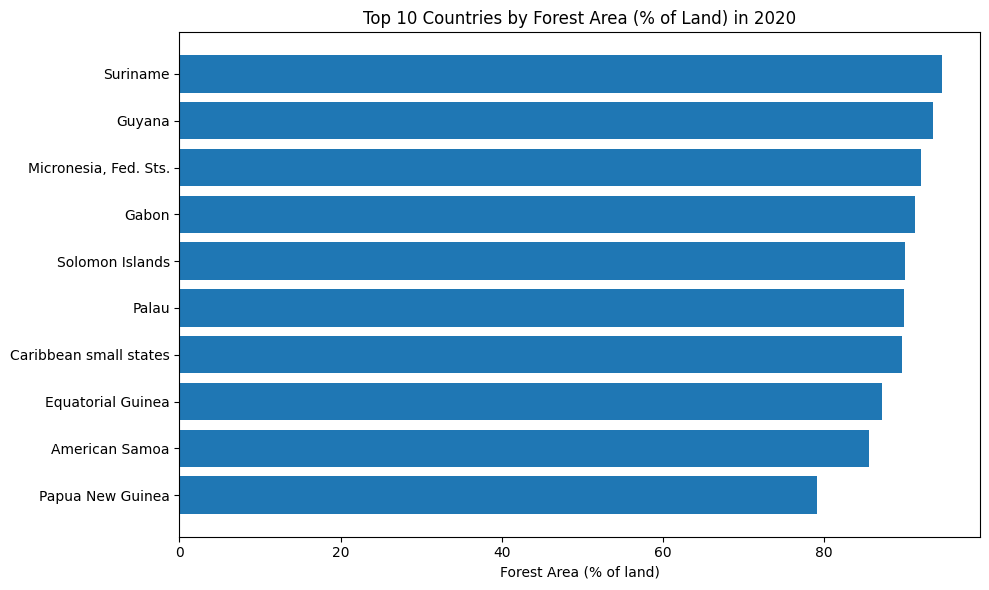

In [17]:
# Get data for year 2020
df_2020 = df_long[df_long['Year'] == 2020]

# Sort and select top 10
top_10_2020 = df_2020.sort_values(by='Forest Area (% of land)', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_10_2020['Country Name'], top_10_2020['Forest Area (% of land)'])
plt.title('Top 10 Countries by Forest Area (% of Land) in 2020')
plt.xlabel('Forest Area (% of land)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


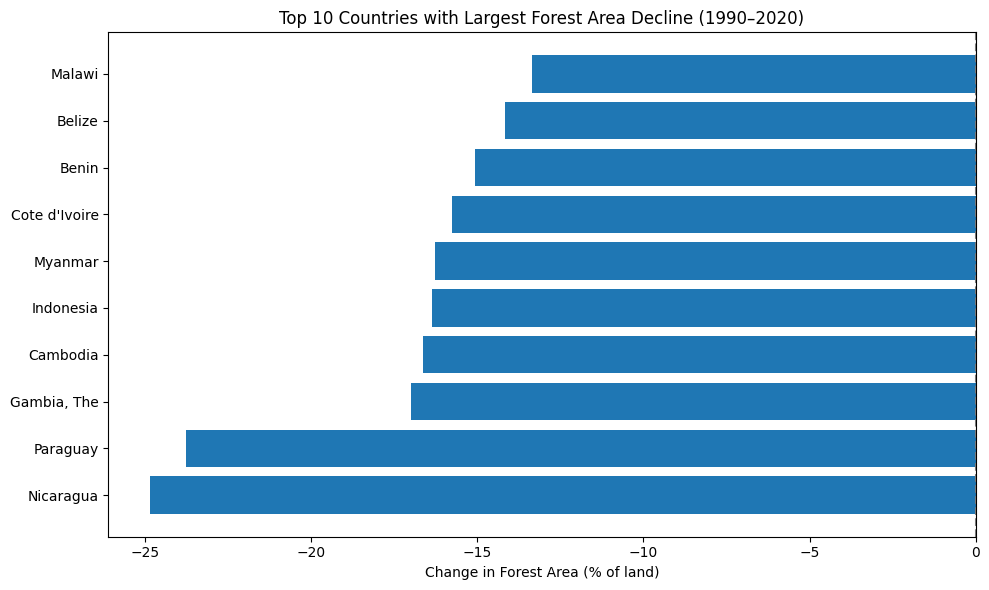

In [18]:
# Get 1990 and 2020 data
df_1990 = df_long[df_long['Year'] == 1990][['Country Name', 'Forest Area (% of land)']].rename(columns={'Forest Area (% of land)': '1990'})
df_2020 = df_long[df_long['Year'] == 2020][['Country Name', 'Forest Area (% of land)']].rename(columns={'Forest Area (% of land)': '2020'})

# Merge and calculate difference
df_change = pd.merge(df_1990, df_2020, on='Country Name')
df_change['Change'] = df_change['2020'] - df_change['1990']

# Get largest declines
biggest_losses = df_change.sort_values(by='Change').head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(biggest_losses['Country Name'], biggest_losses['Change'])
plt.title('Top 10 Countries with Largest Forest Area Decline (1990–2020)')
plt.xlabel('Change in Forest Area (% of land)')
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()
